<a href="https://colab.research.google.com/github/LeToyek/2141720085-pcvk-2023/blob/main/week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

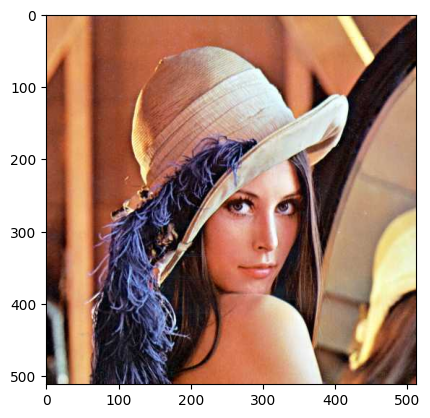

In [3]:
img = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

<BarContainer object of 256 artists>

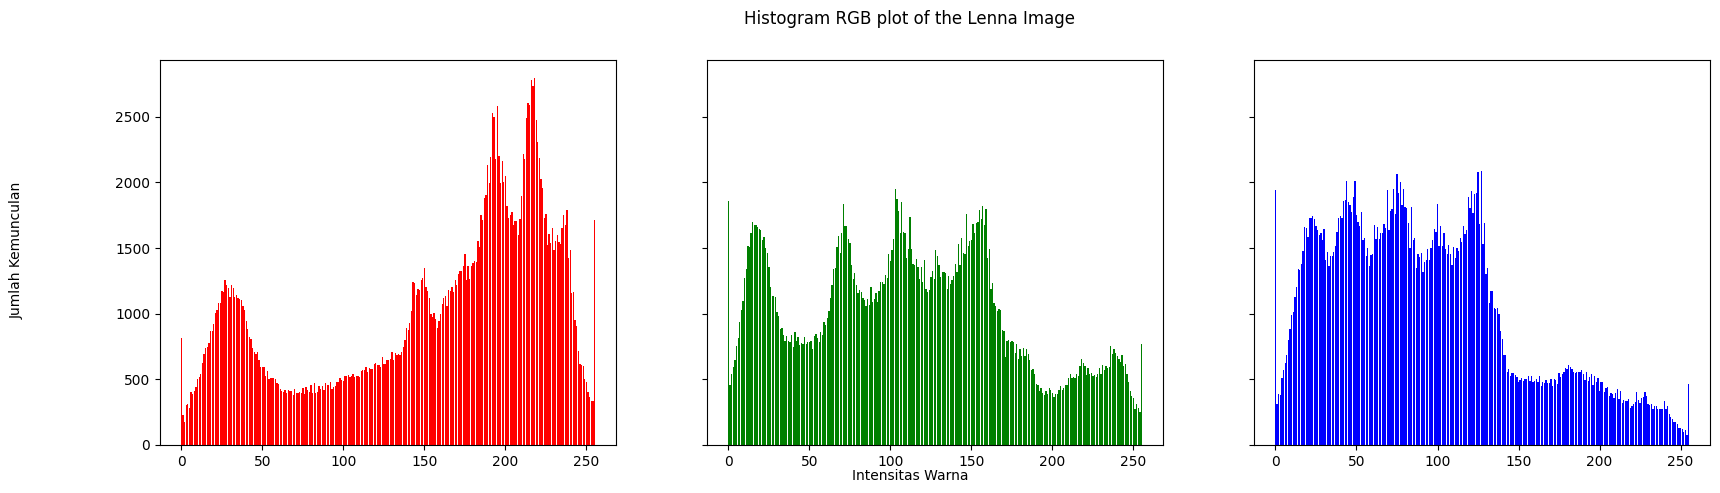

In [4]:
# Mendapatkan dimensi gambar (tinggi, lebar, kedalaman warna)
height, width, depth = np.shape(img)
# Membuat array dengan nama intensitas warna (0-255)
names = np.arange(256)

# Inisialisasi array yang akan digunakan untuk menghitung kemunculan intensitas warna
blue = [0]*256
green = [0]*256
red = [0]*256

# Loop melalui setiap piksel gambar
for y in range(0,height):
  for x in range(0,width):
    blue[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    red[img[y][x][2]] += 1

# Membuat plot histogram RGB dalam tiga subplot
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot of the Lenna Image')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

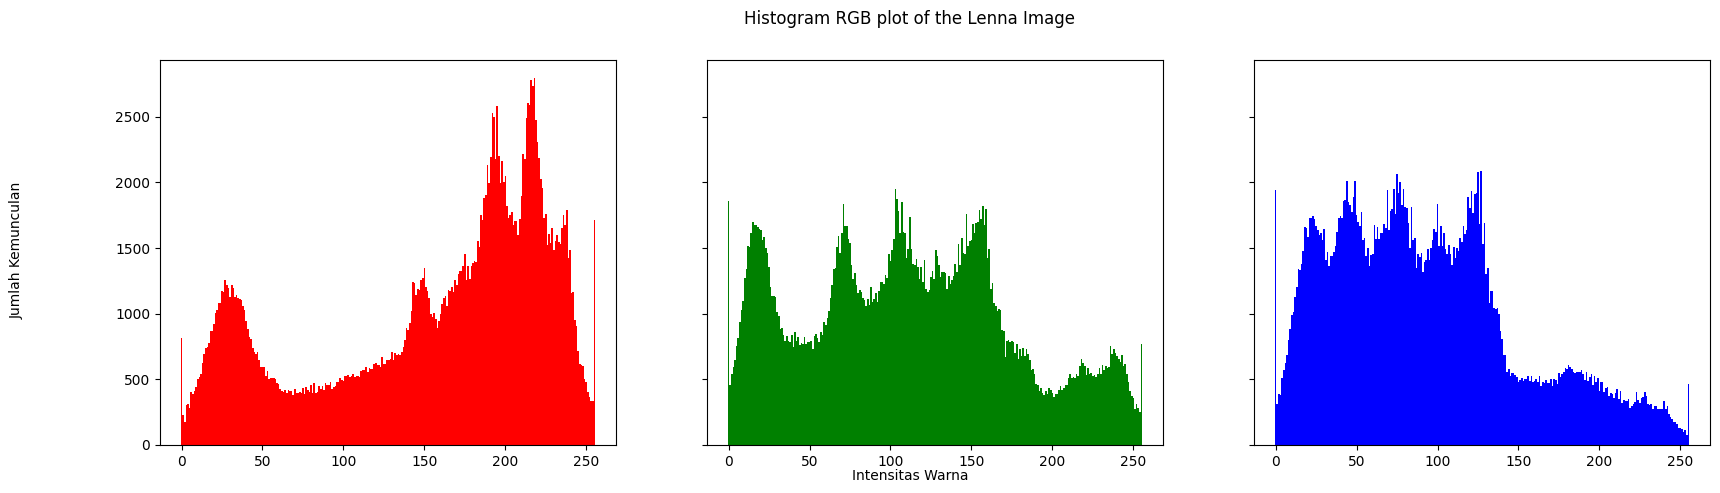

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Mendapatkan dimensi gambar (tinggi, lebar, kedalaman warna)
height, width, depth = img.shape

# Ubah gambar menjadi bentuk yang sesuai (flattened)
flat_img = img.reshape(-1, 3)

# Menghitung histogram RGB menggunakan np.histogram
red_hist = np.histogram(flat_img[:, 2], bins=np.arange(257))
green_hist = np.histogram(flat_img[:, 1], bins=np.arange(257))
blue_hist = np.histogram(flat_img[:, 0], bins=np.arange(257))

# Membuat plot histogram RGB dalam tiga subplot
fig, axs = plt.subplots(1, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot of the Lenna Image')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(red_hist[1][:-1], red_hist[0], color='red', width=1)
axs[1].bar(green_hist[1][:-1], green_hist[0], color='green', width=1)
axs[2].bar(blue_hist[1][:-1], blue_hist[0], color='blue', width=1)

plt.show()


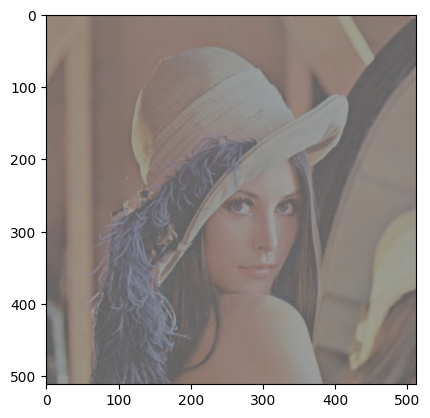

In [6]:
img = cv.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

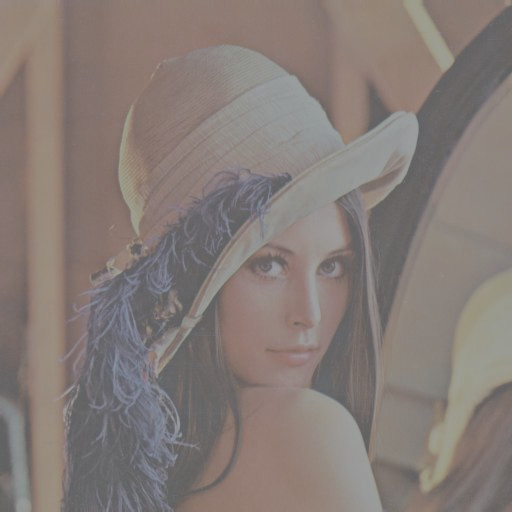

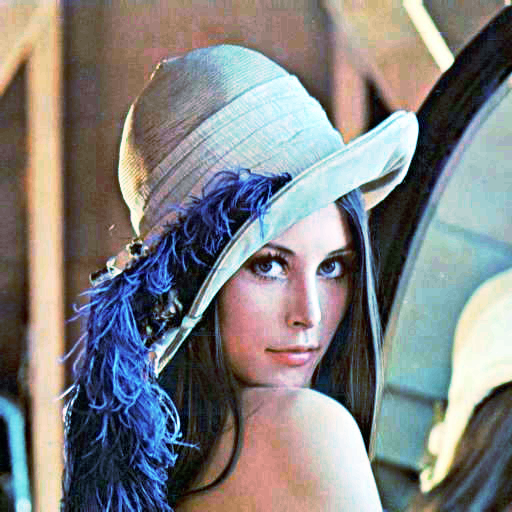

In [7]:
blc, glc, rlc = cv.split(img)

equalized_blc = cv.equalizeHist(blc)
equalized_glc = cv.equalizeHist(glc)
equalized_rlc = cv.equalizeHist(rlc)

equalized_imglc = cv.merge((equalized_blc, equalized_glc, equalized_rlc))

cv2_imshow(img)
cv2_imshow(equalized_imglc)

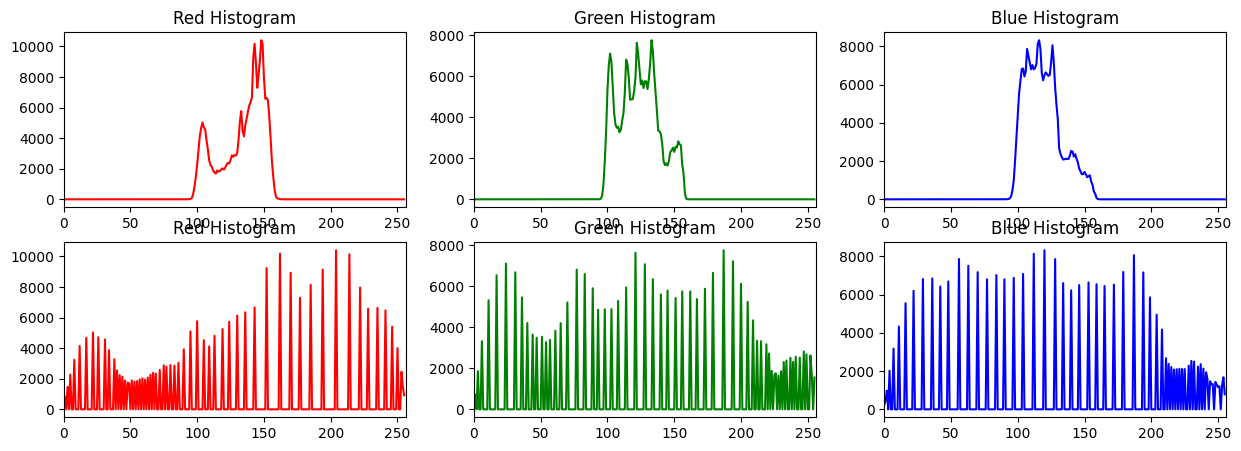

In [8]:
lchist_b = np.histogram(blc.ravel(), bins=256, range=(0, 256))
lchist_g = np.histogram(glc.ravel(), bins=256, range=(0, 256))
lchist_r = np.histogram(rlc.ravel(), bins=256, range=(0, 256))

blch, glch, rlch = cv.split(equalized_imglc)

lchhist_b = np.histogram(blch.ravel(), bins=256, range=(0, 256))
lchhist_g = np.histogram(glch.ravel(), bins=256, range=(0, 256))
lchhist_r = np.histogram(rlch.ravel(), bins=256, range=(0, 256))

# Create subplots to display the histograms
plt.figure(figsize=(15, 5))

# Red channel histogram
plt.subplot(231)
plt.plot(lchist_r[0], color='r')
plt.title('Red Histogram')
plt.xlim([0, 256])

# Green channel histogram
plt.subplot(232)
plt.plot(lchist_g[0], color='g')
plt.title('Green Histogram')
plt.xlim([0, 256])

# Blue channel histogram
plt.subplot(233)
plt.plot(lchist_b[0], color='b')
plt.title('Blue Histogram')
plt.xlim([0, 256])

# histogram equalized
# Red channel histogram
plt.subplot(234)
plt.plot(lchhist_r[0], color='r')
plt.title('Red Histogram')
plt.xlim([0, 256])

# Green channel histogram
plt.subplot(235)
plt.plot(lchhist_g[0], color='g')
plt.title('Green Histogram')
plt.xlim([0, 256])

# Blue channel histogram
plt.subplot(236)
plt.plot(lchhist_b[0], color='b')
plt.title('Blue Histogram')
plt.xlim([0, 256])

plt.show()

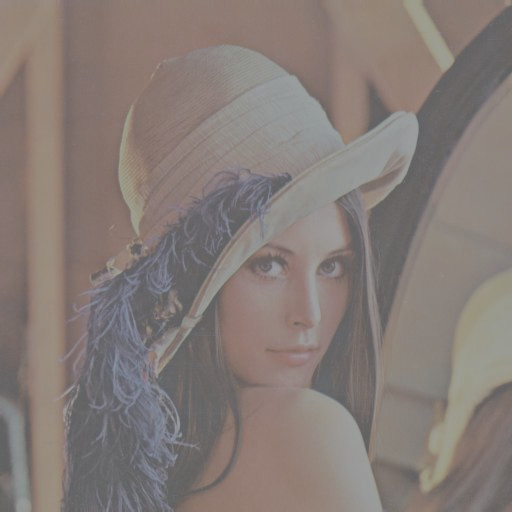

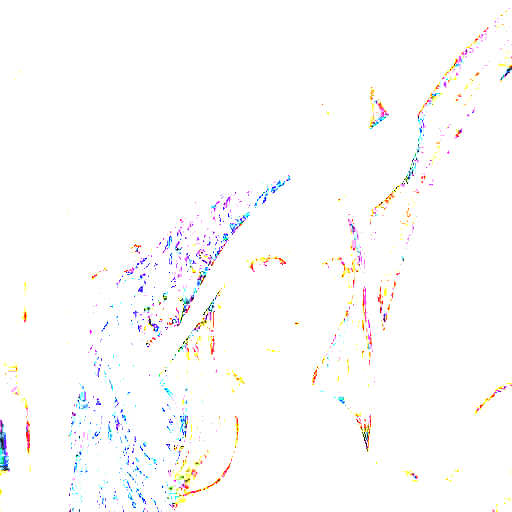

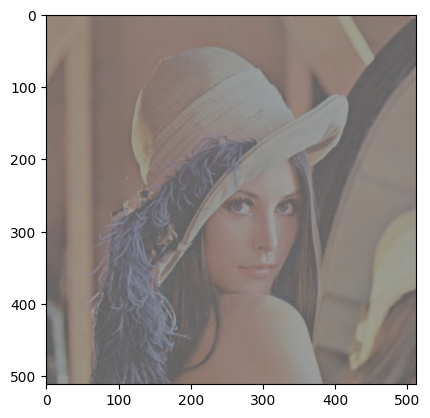

In [15]:
# Split the image into B, G, and R channels
img = cv.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)
blc, glc, rlc = cv.split(img)
def manual_histogram_equalization(channel):
    # Calculate the histogram
    hist, bins = np.histogram(channel.flatten(), 256, [0, 256])

    # Calculate the cumulative distribution function (CDF)
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()

    # Apply the mapping function to equalize the channel
    equalized_channel = cdf_normalized[channel]

    return equalized_channel

# Manually equalize each channel
equalized_blc = manual_histogram_equalization(blc)
equalized_glc = manual_histogram_equalization(glc)
equalized_rlc = manual_histogram_equalization(rlc)

# Merge the equalized channels back together
equalized_imglc = cv.merge((equalized_blc, equalized_glc, equalized_rlc))

# Display the original and equalized images
cv2_imshow( img)
cv2_imshow( equalized_imglc)
cv.waitKey(0)
cv.destroyAllWindows()